<a href="https://colab.research.google.com/github/RojaCM/Complete-Python-3-Bootcamp/blob/master/text%20classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A Simplied Interface to Text Classification With Hugging Face Transformers in TensorFlow Using ktrain

https://www.analyticsvidhya.com/blog/2021/11/a-guide-to-building-an-end-to-end-multiclass-text-classification-model/

In [1]:
!pip3 install -q tensorflow_gpu==2.1.0

     |████████████████████████████████| 421.8 MB 5.3 kB/s 
     |████████████████████████████████| 448 kB 57.2 MB/s 
     |████████████████████████████████| 26.1 MB 1.5 MB/s 
     |████████████████████████████████| 50 kB 6.4 MB/s 
     |████████████████████████████████| 3.8 MB 39.9 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.9.2 requires tensorboard<2.10,>=2.9, but you have tensorboard 2.1.1 which is incompatible.
tensorflow 2.9.2 requires tensorflow-estimator<2.10.0,>=2.9.0rc0, but you have tensorflow-estimator 2.1.0 which is incompatible.
tensorflow-probability 0.16.0 requires gast>=0.3.2, but you have gast 0.2.2 which is incompatible.
plotnine 0.8.0 requires scipy>=1.5.0, but you have scipy 1.4.1 which is incompatible.
jaxlib 0.3.22+cuda11.cudnn805 requires scipy>=1.5, but you have scipy 1.4.1 which is incompatible.
jax 0.3.23 requires

In [14]:
!pip3 install -q ktrain

     |████████████████████████████████| 25.3 MB 85.7 MB/s 
     |████████████████████████████████| 981 kB 54.1 MB/s 
     |████████████████████████████████| 263 kB 60.3 MB/s 
     |████████████████████████████████| 3.8 MB 36.9 MB/s 
     |████████████████████████████████| 1.3 MB 67.8 MB/s 
     |████████████████████████████████| 468 kB 43.4 MB/s 
     |████████████████████████████████| 163 kB 56.4 MB/s 
     |████████████████████████████████| 7.6 MB 34.0 MB/s 
     |████████████████████████████████| 880 kB 59.0 MB/s 


In [3]:
#load dataset
from sklearn.model_selection import train_test_split
import pandas as pd

In [4]:
data=pd.read_csv('sample_dex_data.csv')

In [5]:
data.head()

,Unnamed: 0,title,summary,category
0,0,Reminder - Optimus - Best People Manager 2022,Today is the last day for voting (14th October...,TWEETS
1,1,"It starts this 23 October, till 26 October 202...",Hope you are all set to attend Money 2020 USA ...,TWEETS
2,2,Congratulations Triveni Arun Bhalerao | Long S...,NaN,WHO_SAID_WHAT
3,3,Long Service Awards - 5 years - Triveni Arun ...,NaN,STORY_OF_THE_DAY
4,4,tweets testing,today testing preview screen and toast success...,TWEETS


In [6]:
df1=data.copy()

In [41]:
df2=df1[['title','category']]

In [42]:
x=df2['title']
y=df2['category']

In [43]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=100)

In [12]:
categories=['TWEETS','COMPANY_INFORMATION','STORY_OF_THE_DAY','TECHNO_PICKS','INDUSTRY_UPDATE','WHO_SAID_WHAT','FEATURED_VIDEOS','SUCCESS_STORY','PEOPLE_OF_ALTIMETRIK',
        'ALTIMETRIK_NEWS','EMPLOYEE_EXPERIENCES','ABOUT_ALTIMETRIK','CAPABILITY_CENTERS','GLOBAL_RECOGNITIONS','INNOVATION_AT_ALTIMETRIK','TRENDING_STORY','EBOOK',
        'STATIC_CONTENT','DIGITAL_BUSINESS']

In [16]:
import os
import pandas as pd
import numpy as np
from scipy.stats import randint
import seaborn as sns # used for plot interactive graph.
import matplotlib.pyplot as plt
import seaborn as sns
from io import StringIO
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import chi2
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [17]:
df2

,title,category
0,Reminder - Optimus - Best People Manager 2022,TWEETS
1,"It starts this 23 October, till 26 October 202...",TWEETS
2,Congratulations Triveni Arun Bhalerao | Long S...,WHO_SAID_WHAT
3,Long Service Awards - 5 years - Triveni Arun ...,STORY_OF_THE_DAY
4,tweets testing,TWEETS
...,...,...
995,"Employee Referral Virtual Drive - 14 May, 2022",COMPANY_INFORMATION
996,The Future Trends In Mobility And Transportation,INDUSTRY_UPDATE
997,The Keys to Pricing Power as Recession Looms,INDUSTRY_UPDATE
998,Intelligence and unified data governance in th...,TECHNO_PICKS


In [19]:
# Create a new column 'category_id' with encoded categories 
df2['category_id'] = df2['category'].factorize()[0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [21]:
df2.head()

,title,category,category_id
0,Reminder - Optimus - Best People Manager 2022,TWEETS,0
1,"It starts this 23 October, till 26 October 202...",TWEETS,0
2,Congratulations Triveni Arun Bhalerao | Long S...,WHO_SAID_WHAT,1
3,Long Service Awards - 5 years - Triveni Arun ...,STORY_OF_THE_DAY,2
4,tweets testing,TWEETS,0


In [22]:
df2.category_id.nunique()

19

In [25]:
category_id_df = df2[['category', 'category_id']].drop_duplicates()

In [26]:
category_id_df

,category,category_id
0,TWEETS,0
2,WHO_SAID_WHAT,1
3,STORY_OF_THE_DAY,2
5,COMPANY_INFORMATION,3
6,SUCCESS_STORY,4
13,FEATURED_VIDEOS,5
79,TECHNO_PICKS,6
80,INDUSTRY_UPDATE,7
105,CAPABILITY_CENTERS,8
432,TRENDING_STORY,9


In [28]:
# Dictionaries for future use
category_to_id = dict(category_id_df.values)

In [29]:
category_to_id

{'TWEETS': 0,
 'WHO_SAID_WHAT': 1,
 'STORY_OF_THE_DAY': 2,
 'COMPANY_INFORMATION': 3,
 'SUCCESS_STORY': 4,
 'FEATURED_VIDEOS': 5,
 'TECHNO_PICKS': 6,
 'INDUSTRY_UPDATE': 7,
 'CAPABILITY_CENTERS': 8,
 'TRENDING_STORY': 9,
 'INNOVATION_AT_ALTIMETRIK': 10,
 'GLOBAL_RECOGNITIONS': 11,
 'ABOUT_ALTIMETRIK': 12,
 'DIGITAL_BUSINESS': 13,
 'PEOPLE_OF_ALTIMETRIK': 14,
 'EMPLOYEE_EXPERIENCES': 15,
 'ALTIMETRIK_NEWS': 16,
 'STATIC_CONTENT': 17,
 'EBOOK': 18}

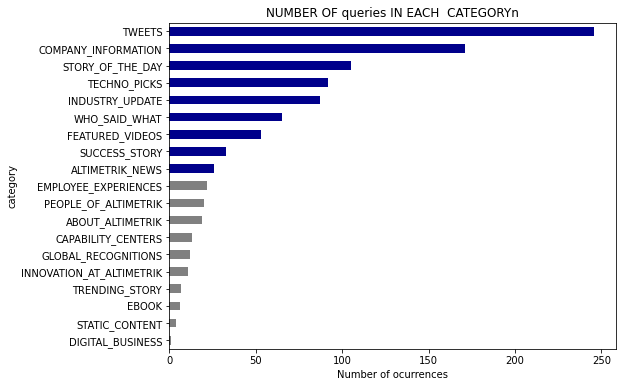

In [34]:
fig = plt.figure(figsize=(8,6))
colors = ['grey','grey','grey','grey','grey','grey','grey','grey','grey',
    'grey','darkblue','darkblue','darkblue','darkblue','darkblue','darkblue','darkblue','darkblue','darkblue']
df2.groupby('category').title.count().sort_values().plot.barh(
    ylim=0, color=colors, title= 'NUMBER OF queries IN EACH  CATEGORYn')
plt.xlabel('Number of ocurrences', fontsize = 10);

In [36]:
df2.dropna(inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [38]:
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5,
                        ngram_range=(1, 2), 
                        stop_words='english')
# We transform each complaint into a vector
features = tfidf.fit_transform(df2.title).toarray()
labels = df2.category_id
print("Each of the %d queries is represented by %d features (TF-IDF score of unigrams and bigrams)" %(features.shape))

Each of the 993 queries is represented by 298 features (TF-IDF score of unigrams and bigrams)


In [40]:
# Finding the three most correlated terms with each of the product categories
N = 3
for category, category_id in sorted(category_to_id.items()):
  features_chi2 = chi2(features, labels == category_id)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  print("n==> %s:" %(category))
  print("  * Most Correlated Unigrams are: %s" %(', '.join(unigrams[-N:])))
  print("  * Most Correlated Bigrams are: %s" %(', '.join(bigrams[-N:])))

n==> ABOUT_ALTIMETRIK:
  * Most Correlated Unigrams are: certified, growth, altimetrik
  * Most Correlated Bigrams are: place work, great place, altimetrik growth
n==> ALTIMETRIK_NEWS:
  * Most Correlated Unigrams are: watch, media, coverage
  * Most Correlated Bigrams are: media coverage, awards business, big awards
n==> CAPABILITY_CENTERS:
  * Most Correlated Unigrams are: product, platform, engineering
  * Most Correlated Bigrams are: digital business, platform engineering, product platform
n==> COMPANY_INFORMATION:
  * Most Correlated Unigrams are: media, coverage, referral
  * Most Correlated Bigrams are: media coverage, service award, employee referral
n==> DIGITAL_BUSINESS:
  * Most Correlated Unigrams are: altimetrik, business, digital
  * Most Correlated Bigrams are: populating tweet, media coverage, digital business
n==> EBOOK:
  * Most Correlated Unigrams are: voice, altimetrik, ebook
  * Most Correlated Bigrams are: populating tweet, media coverage, digital business
n==> EM

In [44]:
models = [
    RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]

In [45]:
# 5 Cross-validation
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))

In [46]:
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,


In [47]:
mean_accuracy = cv_df.groupby('model_name').accuracy.mean()
std_accuracy = cv_df.groupby('model_name').accuracy.std()

acc = pd.concat([mean_accuracy, std_accuracy], axis= 1, 
          ignore_index=True)
acc.columns = ['Mean Accuracy', 'Standard deviation']
acc

,Mean Accuracy,Standard deviation
model_name,,
LinearSVC,0.416857,0.042879
LogisticRegression,0.439049,0.044276
MultinomialNB,0.436039,0.026195
RandomForestClassifier,0.287026,0.015102
